In [2]:
import pyedflib
import numpy as np
import pandas as pd
from scipy.signal import stft
import wfdb, mne
import matplotlib.pyplot as plt
import cv2
import os
import librosa.display
import math

In [3]:
path = 'data/abdominal-and-direct-fetal-ecg-database-1.0.0/r04.edf'
# path = 'data/non-invasive-fetal-ecg-database-1.0.0/ecgca102.edf'
record = mne.io.read_raw_edf(path, preload=True)
# record.crop(tmin=10, tmax = record.times[-1] - 10)
# record.resample(200)
# plt.plot(spec, color='rainbow')


Extracting EDF parameters from /Users/vuongnguyen/Documents/Papers/FetalECG/Code/fECG_GAN/data/abdominal-and-direct-fetal-ecg-database-1.0.0/r04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 299999  =      0.000 ...   299.999 secs...


In [16]:
import wfdb

# Set the path to your .qrs file
file_path = 'data/non-invasive-fetal-ecg-database-1.0.0/ecgca102.edf.qrs'

# Read the signal and annotation data from the file
signal, fields = wfdb.rdrecord(file_path)
# annotation = wfdb.rdann(file_path, 'qrs')

# Print the fields (metadata) associated with the signal data
# print(fields)

# # Print the first 10 samples of the signal data
# print(signal[:10])

# # Print the annotation samples and symbols
# print(annotation.sample)
# print(annotation.symbol)
print(record.__dict__)

# Print the first 10 samples of the signal data
print(record.p_signal[:10])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/vuongnguyen/Documents/Papers/FetalECG/Code/fECG_GAN/data/non-invasive-fetal-ecg-database-1.0.0/ecgca102.edf.qrs.hea'

In [11]:
file = 'ecgca102.edf.qrs'
wfdb.rdrecord(file, pn_dir='nifecgdb')

NetFileNotFoundError: 404 Error: Not Found for url: https://physionet.org/files/nifecgdb/1.0.0/ecgca102.edf.qrs.hea

/var/folders/pj/0_7y5gws315gpcg31k717yr80000gn/T/ipykernel_39920/1402071928.py:47: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=250).
  ax[0].specgram(e, Fs=1000, cmap='rainbow')
/var/folders/pj/0_7y5gws315gpcg31k717yr80000gn/T/ipykernel_39920/1402071928.py:48: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=250).
  ax[1].specgram(f, Fs=1000, cmap='rainbow')


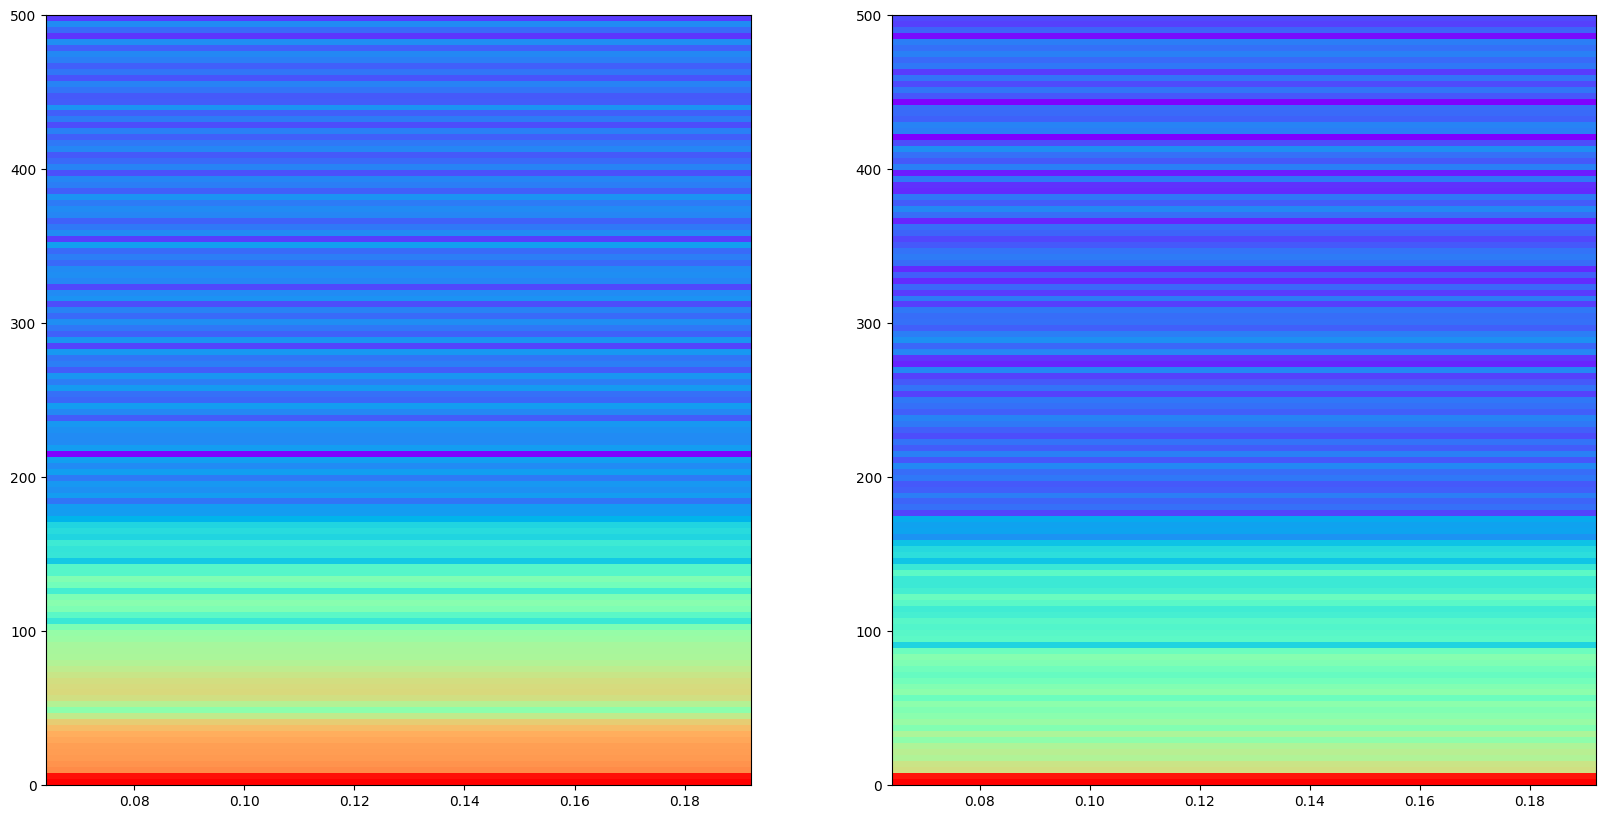

In [4]:
raw_data = record.get_data(0)
aecg = record.get_data(1)
# a=raw_data[:250]
# _, _, spec = stft(
#     raw_data,
#     fs = 1000,
#     window='hamming',
#     nperseg=36,
#     noverlap=30,
#     nfft=256
# ) 
# spec = np.abs(spec)
# plt.imshow(spec.T)
# plt.show()

b = raw_data[0, :]
minx = min(b)
maxx = max(b)
minx, maxx
norm_data = [(2*(val - minx) / (maxx - minx) - 1) for val in raw_data]

g = aecg[0, :]
ming = min(g)
maxg = max(g)
norm_data1 = [(2*(val - ming) / (maxg - ming) - 1) for val in aecg]
# for val in b:
#     norm_val = 2*(val - min(b)) / (max(b) - min(b)) - 1
#     norm_data.append(norm_val)

norm_data = np.array(norm_data)
norm_data1 = np.array(norm_data1)
c = norm_data[0, :]
d = norm_data1[0, :]
e = c[1000:1250]
f = d[1000:1250]
# _, _, spec = stft(
#     #norm_data[0, :],
#     c,
#     fs = 1000,
#     window='hamming',
#     nperseg=36,
#     # noverlap=10,
#     nfft=256
# ) 
# spec = float(spec)
figure, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].specgram(e, Fs=1000, cmap='rainbow')
ax[1].specgram(f, Fs=1000, cmap='rainbow')
# spec = spec.astype(float)
# spec = np.abs(spec)
# plt.imshow(spec.T)
plt.show()

In [114]:
Time_difference = 0.0001
 
# Generating an array of values
Time_Array = np.linspace(0, 5, math.ceil(5 / Time_difference))
 
# Actual data array which needs to be plot
Data = 20*(np.sin(3 * np.pi * Time_Array))
d = Data[:250]
# # Matplotlib.pyplot.specgram() function to
# # generate spectrogram
# plt.specgram(d, Fs=1000, cmap="rainbow")
 
# # Set the title of the plot, xlabel and ylabel
# # and display using show() function
# plt.title('Spectrogram Using matplotlib.pyplot.specgram() Method')
# plt.xlabel("DATA")
# plt.ylabel("TIME")
# plt.show()
d

array([0.        , 0.01884993, 0.03769984, 0.05654972, 0.07539955,
       0.09424932, 0.11309899, 0.13194857, 0.15079803, 0.16964736,
       0.18849654, 0.20734555, 0.22619437, 0.245043  , 0.2638914 ,
       0.28273958, 0.3015875 , 0.32043515, 0.33928252, 0.35812958,
       0.37697633, 0.39582275, 0.41466881, 0.4335145 , 0.45235981,
       0.47120472, 0.49004921, 0.50889326, 0.52773686, 0.54657999,
       0.56542264, 0.58426479, 0.60310641, 0.6219475 , 0.64078804,
       0.65962801, 0.67846739, 0.69730617, 0.71614433, 0.73498185,
       0.75381872, 0.77265492, 0.79149044, 0.81032525, 0.82915934,
       0.8479927 , 0.8668253 , 0.88565713, 0.90448818, 0.92331842,
       0.94214784, 0.96097643, 0.97980416, 0.99863102, 1.01745699,
       1.03628206, 1.05510621, 1.07392943, 1.09275169, 1.11157297,
       1.13039327, 1.14921257, 1.16803084, 1.18684808, 1.20566427,
       1.22447938, 1.2432934 , 1.26210632, 1.28091812, 1.29972878,
       1.31853829, 1.33734663, 1.35615377, 1.37495972, 1.39376

In [12]:
fecg = (fecg - np.mean(fecg)) / np.std(fecg)
fecg = np.clip(fecg, -1, 1)
fecg.shape[0]

300000

In [18]:
sample_rate = record.info['sfreq']
segment_length = int(0.25 * sample_rate) #250
segment_overlap = int(0.01 * sample_rate) #10

segments = []
for i in range(0, fecg.shape[0] - segment_length, segment_length - segment_overlap):
    segment = fecg[i:i+segment_length]
    segments.append(segment)

segments = np.array(segments)

frequencies, times, stft_data = stft(
    segments, 
    fs=sample_rate,
    window='hamming',
    nperseg=36,
    noverlap=30,
    nfft=256
)

# stft_data = np.abs(stft_data)
# stft_data = stft_data / np.max(stft_data)

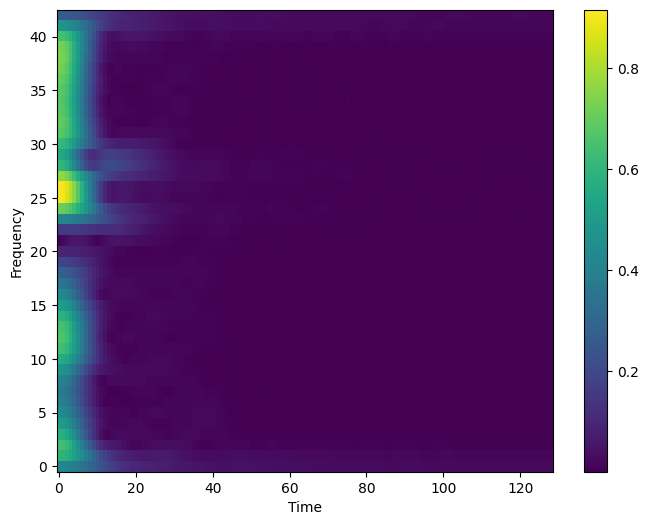

In [31]:
stft_data_magnitude = np.abs(stft_data)
plt.figure(figsize=(8, 6))
plt.imshow(stft_data_magnitude[4].T, aspect='auto', origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

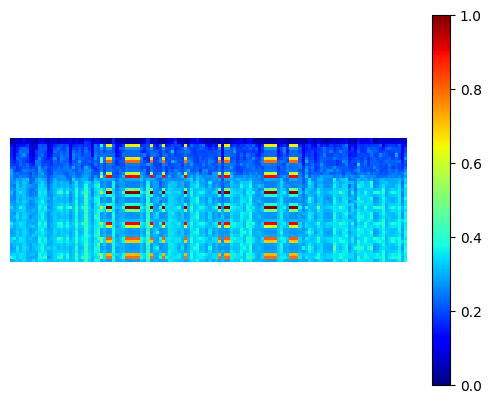

In [27]:
def plot_spectrogram(signal, sample_rate, window_length, hop_length, fft_size, output_shape):
    frequencies, times, spectrogram = stft(signal, fs=sample_rate, window='hamming', nperseg=window_length, noverlap=window_length-hop_length, nfft=fft_size)
    spectrogram = np.abs(spectrogram)
    spectrogram = spectrogram / np.max(spectrogram)
    spectrogram = 10 * np.log10(spectrogram + 1e-10)
    spectrogram = cv2.resize(spectrogram, output_shape, interpolation=cv2.INTER_LINEAR)
    spectrogram = (spectrogram - np.min(spectrogram)) / (np.max(spectrogram) - np.min(spectrogram))
    spectrogram = 1 - spectrogram
    return spectrogram

window_length = 64 # Hamming window of length 64
hop_length = 32 # Hop size of 32
fft_size = 256

spectrogram = plot_spectrogram(fecg, sample_rate, window_length, hop_length, fft_size, output_shape=(128, 40))
plt.imshow(spectrogram, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

In [62]:
class ECGDataset:
    def __init__(self, data_dir, img_dir):
        self.data_dir = data_dir
        self.img_dir = img_dir
        self.fs = 1000  # Sampling frequency
        self.nperseg = 36  # Window size for STFT
        self.nfft = 256  # FFT size for STFT
        self.noverlap = self.nperseg - 6  # Hop size for STFT
        self.freq_range = (0, 40)  # Frequency range to plot in spectrogram
        self.normalize = True  # Whether to normalize data to [-1, 1]
        self.ecg_files = [f for f in os.listdir(data_dir) if f.endswith('.edf')]
        self.n_files = len(self.ecg_files)
        self.ecg_data = []
        self.fetal_data = []
        self.n_segments = []
        
    def load_data(self):
        # Load ECG and fetal ECG data from files
        for i, file in enumerate(self.ecg_files):
            raw = mne.io.read_raw_edf(os.path.join(self.data_dir, file))
            raw_data = raw.get_data()
            n = raw_data.shape[0]
            fetal_data = raw_data[0, :]
            ecg_data = raw_data[1:n, :]
            if self.normalize:
                ecg_data = 2 * (ecg_data - np.min(ecg_data)) / (np.max(ecg_data) - np.min(ecg_data)) - 1
                fetal_data = 2 * (fetal_data - np.min(fetal_data)) / (np.max(fetal_data) - np.min(fetal_data)) - 1
            self.ecg_data.append(ecg_data)
            self.fetal_data.append(fetal_data)
            self.n_segments.append(ecg_data.shape[1] // (self.fs // 4))  # Divide by quarter of a second
        self.ecg_data = np.concatenate(self.ecg_data, axis=1)
        self.fetal_data = np.concatenate(self.fetal_data)
        # return self.ecg, self.fecg
    def compute_stft(self, signal):
        f, t, Zxx = stft(signal, fs=self.fs, window='hamming', nperseg=self.nperseg, noverlap=self.noverlap, nfft=self.nfft)
        Zxx = np.abs(Zxx)
        Zxx = Zxx / np.max(Zxx)  # Normalize to [0, 1]
        # Zxx = Zxx[:, (f >= self.freq_range[0]) & (f <= self.freq_range[1])]  # Only keep frequencies in freq_range
        return Zxx
    
    def create_spectrograms(self):
    # Compute STFT and create spectrograms for each segment of each ECG signal
        self.spectrograms = []
        for i, file in enumerate(self.ecg_files):
            ecg_data = self.ecg_data[:, i*self.n_segments[i]*self.fs//4:(i+1)*self.n_segments[i]*self.fs//4]
            fetal_data = self.fetal_data[i*self.n_segments[i]*self.fs//4:(i+1)*self.n_segments[i]*self.fs//4]
            for j in range(self.n_segments[i]):
                ecg_seg = ecg_data[:, j*self.fs//4:(j+1)*self.fs//4]
                fetal_seg = fetal_data[j*self.fs//4:(j+1)*self.fs//4]
                ecg_spectrogram = self.compute_stft(ecg_seg)
                fetal_spectrogram = self.compute_stft(fetal_seg)
                # Create figure and plot spectrograms
                fig, axs = plt.subplots(2, 1, figsize=(6, 6))
                axs[0].imshow(ecg_spectrogram.T, origin='lower')
                axs[1].imshow(fetal_spectrogram.T, origin='lower')
                # Remove axis labels and ticks
                for ax in axs:
                    ax.set_xticks([])
                    ax.set_yticks([])
                    ax.set_xticklabels([])
                    ax.set_yticklabels([])
                # Save figure as PNG image
                img_filename = os.path.join(self.img_dir, file[:-4] + f"fecg_segment{j:03d}.png")
                plt.savefig(img_filename, bbox_inches='tight')
                plt.close()
                # Append image filename to list
                self.spectrograms.append(img_filename)

    # def create_spectrograms(self, segment_duration=0.25, hop_size=6, window_size=36, fft_size=256):
    #     # Compute the number of frames per segment
    #     ecg, fecg = self.load_data()
    #     n_frames = int((segment_duration * self.fs - window_size) // hop_size + 1)
        
    #     # Initialize an empty list to store the spectrogram images
    #     fecg_spectrograms = []
    #     ecg_spectrograms = []
        
    #     # Loop over the data segments and compute the spectrogram for each segment
        
    #     for i in range(data.n_times // (segment_duration * self.fs)):
    #         # Extract the segment of data
    #         segment = data[:, i * n_frames * hop_size : (i+1) * n_frames * hop_size]
            
    #         # Compute the STFT for the segment
    #         f, t, Zxx = stft(segment, fs=data.info['sfreq'], window='hamming', nperseg=window_size, noverlap=window_size-hop_size, nfft=fft_size)
            
    #         # Convert the magnitude spectrogram to dB scale
    #         Zxx = librosa.amplitude_to_db(np.abs(Zxx), ref=np.max)
            
    #         # Normalize the spectrogram to [0, 1]
    #         Zxx = (Zxx - np.min(Zxx)) / (np.max(Zxx) - np.min(Zxx))
            
    #         # Rescale the spectrogram to 0-255 and convert to uint8
    #         Zxx = (Zxx * 255).astype(np.uint8)
            
    #         # Apply the colormap to create a color image
    #         colormap = plt.get_cmap('inferno')
    #         Zxx_color = colormap(Zxx)[:,:,:3] # Take only RGB channels
            
    #         # Create a PIL image from the spectrogram and append it to the list
    #         spectrogram_image = Image.fromarray(np.uint8(Zxx_color))
    #         spectrograms.append(spectrogram_image)
        
    #     # Return the list of spectrogram images
    #     return spectrograms



In [63]:
data_dir = 'data/abdominal-and-direct-fetal-ecg-database-1.0.0/'
img_dir = 'data/spectrograms_adfecg/'
adecg = ECGDataset(data_dir=data_dir, img_dir=img_dir)
adecg.load_data()
adecg.create_spectrograms()

Extracting EDF parameters from /Users/vuongnguyen/Documents/Papers/FetalECG/Code/fECG_GAN/data/abdominal-and-direct-fetal-ecg-database-1.0.0/r01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/vuongnguyen/Documents/Papers/FetalECG/Code/fECG_GAN/data/abdominal-and-direct-fetal-ecg-database-1.0.0/r10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/vuongnguyen/Documents/Papers/FetalECG/Code/fECG_GAN/data/abdominal-and-direct-fetal-ecg-database-1.0.0/r04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/vuongnguyen/Documents/Papers/FetalECG/Code/fECG_GAN/data/abdominal-and-direct-fetal-ecg-database-1.0.0/r07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/vuongnguyen/Documents/